# Exercises to be solved in class:

## Car ride to Vienna - I solve it for them (15 min)
We want to go by car from Budapest to Vienna (240 km). For the first 160 km, until Mosonmagyaróvár, we go fast, average speed 100 km/h. We then make a short stop of 20 minutes. How fast do we have to drive for the rest of the way to have an overall average speed of 110 km/h? 

Solution: 321 km/h (would need a Lamborghini)

Discussion: Possibility of no solution 

## Velocity-time plot - I let them do it (p55 from Gewirtz 20 min)
Given the velocity-time plot below, sketch the displacement-time and acceleration-time plots!
Don’t forget axis labels, numbers, units!

## 3.3 from Gewirtz as a test question (5 min)

## 3.10 from Gewirtz as a problem to calculate on their own (suggest as homework)


## 4.2. from Gewirtz as a problem to calculate on their own (5 min)



# Write a short python code useful for homework 6. 

Do it in various steps, incrementally. 

I am standing on a hill, with angle of inclination of 20 degrees. 
I play around with rocks, trying to throw them as far as possible. My throw velocity is 100 km/h, 
I am playing around with the angle (with the vertical axis), letting theta take various values. 
Plot a few of the trajectories! Can you guess what the optimal angle is? (Homework is to calculate it) 

# 1 Single trajectory on a horizontal plane

No inclination. Let's take $\theta=60^\circ$, corresponding to a throw angle from the horizontal line of 30 degrees. 


In [7]:
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


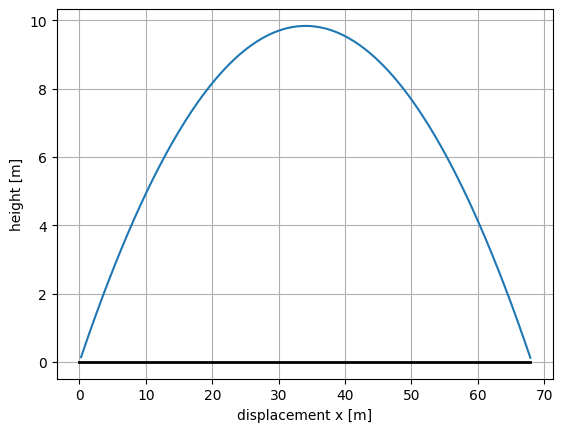

In [8]:
#1 I show how to efficiently do this: The trajectory 
# for 1 theta, on a horizontal plane:

%pylab inline

v = 100/3.6
g = 9.81
t = linspace(0, 10, 1000)
x = v*sin(pi/3.)*t
y = v*cos(pi/3.)*t - g/2*t**2

plt.plot(x[y>0], y[y>0])
x_max = max(x[y>0])
plt.plot([0, x_max], [0, 0], color="black", linewidth="2")
plt.xlabel("displacement x [m]")
plt.ylabel("height [m]")
plt.grid()
plt.show()


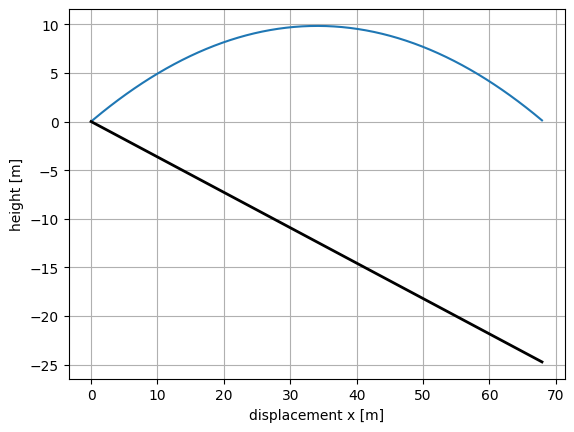

In [15]:
# 2 I show this - how to efficiently add the slope: 

beta = 20*pi/180

t = linspace(0, 10, 1000)
x = v*sin(pi/3.)*t
y = v*cos(pi/3.)*t - g/2*t**2

plot(x[y>0], y[y>0])
x_max = max(x[y>0])

plot([0, x_max], [0, -x_max*tan(beta)], color="black", linewidth="2")

xlabel("displacement x [m]")
ylabel("height [m]")
grid()
show()

In [20]:
# 3: Good, but need to replace y>0 by something else...
 # Try to find out, what!
    
# We can filter the arrays x and y. 
# To understand how, look at this example:
x1 = linspace(0, 10, 11)
print(x1)
print(x1>0.33)
print(x1[[False, True, True, True, False, True, True, True, True, True, False]])
print( x1[x1>0.33])

y1 = linspace(4, 5, 11)
print(y1[x1>0.33])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[False  True  True  True  True  True  True  True  True  True  True]
[1. 2. 3. 5. 6. 7. 8. 9.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


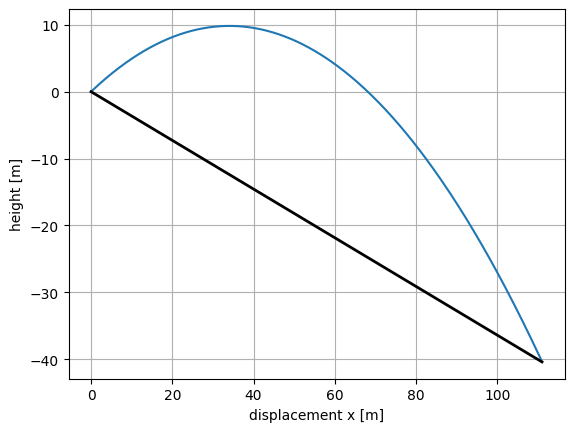

In [11]:
# Solution to 3:
beta = 20*pi/180

t = linspace(0, 10, 1000)
x = v*sin(pi/3.)*t
y = v*cos(pi/3.)*t - g/2*t**2
slope = -x*tan(beta)

plot(x[y>slope], y[y>slope])
x_max = max(x[y>slope])

plot([0, x_max], [0, -x_max*tan(beta)], color="black", linewidth="2")

xlabel("displacement x [m]")
ylabel("height [m]")
grid()
show()

Now put what you had above into a loop!

10.00 20.00 30.00 40.00 50.00 60.00 70.00 80.00 90.00 100.00 

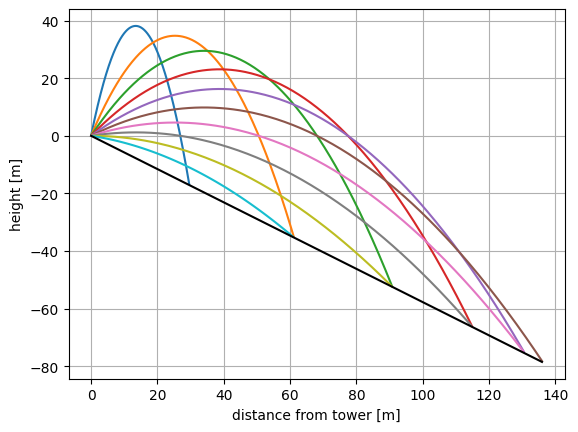

In [12]:
# Classroom python for week 4: 
v = 100 / 3.6      # initial velocity just sets the scale for x and y
g = 9.81

t = linspace(0, 10, 500)
beta = 30/180*pi   # angle of inclined plane
x_max = 0          # maximum of x displacement - need for final plot

for theta in linspace(10, 100, 10)*pi/180:
    print("%.2f"%(theta*180/pi), end=" ")
    x = v*sin(theta)*t
    y = v*cos(theta)*t - g/2*t**2
    slope = -x*tan(beta)
    plot(x[y>slope], y[y>slope])
    x_max = max(x_max, max(x[y>slope])) 

# plot the slope itself
x = linspace(0, x_max, 2)  # since it is a straight line, 2 points are enough
plot(x, -x*tan(beta), color="black")
    
xlabel("distance from tower [m]")
ylabel("height [m]")
grid()

show()